In [1]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# (some of the) hyperparameters
BATCH_SIZE = 32 # unsure, trade off between performance and efficiency
KERNEL_SIZE = 3 # 3x3 kernel for convolution
EPOCHS = 30
LEARNING_RATE = 10**-3

In [3]:
## preparing the data ##
# documentation: www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
train_ds, valid_ds = keras.utils.image_dataset_from_directory(
    directory='training_data/',
    validation_split=0.2, # we want an 80:20 split for our CV
    labels='inferred', # generate labels from directory structure
    subset='both', # return tuple of reduced training set and validation set
    seed=42, # reproducible shuffling
    label_mode='binary', # we do binary classification
    batch_size=BATCH_SIZE,    
    image_size=(256,256), # all images must have the same size
    shuffle=True # enabled by default, facilitates a random split
)

Found 2014 files belonging to 2 classes.
Using 1612 files for training.
Using 402 files for validation.


In [11]:
# Setting up the neural network architecture
print(f'using kernel size {KERNEL_SIZE}')
model = keras.Sequential([
    #Ideally, perform the rescaling in a separate preprocessing step..
    keras.layers.experimental.preprocessing.Rescaling(1/255),
    # Hidden layers
    layers.Conv2D(16, KERNEL_SIZE, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5), # regularization, drop out half (!) of the neurons
    # Output layer, single neuron
    layers.Dense(1, activation='sigmoid')
])

using kernel size 3


In [12]:
"""
All metrics are added, not sure which ones we are interested in
metrics=['accuracy', precision, 'recall', 'f1', 'AUC']
"""
model.compile(loss='binary_crossentropy', optimizer=Adam(LEARNING_RATE), metrics=['accuracy'])
results = model.fit(train_ds, epochs=EPOCHS, validation_data=valid_ds)

Epoch 1/30
51/51 [==============================] - 14s 256ms/step - loss: 1.6438 - accuracy: 0.6135 - val_loss: 0.5945 - val_accuracy: 0.7886
Epoch 2/30
51/51 [==============================] - 13s 255ms/step - loss: 0.5636 - accuracy: 0.7184 - val_loss: 0.4138 - val_accuracy: 0.8333
Epoch 3/30
51/51 [==============================] - 13s 248ms/step - loss: 0.4150 - accuracy: 0.8263 - val_loss: 0.3189 - val_accuracy: 0.8706
Epoch 4/30
51/51 [==============================] - 13s 259ms/step - loss: 0.3828 - accuracy: 0.8443 - val_loss: 0.3356 - val_accuracy: 0.8706
Epoch 5/30
51/51 [==============================] - 13s 255ms/step - loss: 0.3458 - accuracy: 0.8710 - val_loss: 0.2862 - val_accuracy: 0.8731
Epoch 6/30
51/51 [==============================] - 13s 254ms/step - loss: 0.3161 - accuracy: 0.8970 - val_loss: 0.2755 - val_accuracy: 0.8881
Epoch 7/30
51/51 [==============================] - 13s 253ms/step - loss: 0.3035 - accuracy: 0.9076 - val_loss: 0.2816 - val_accuracy: 0.8905

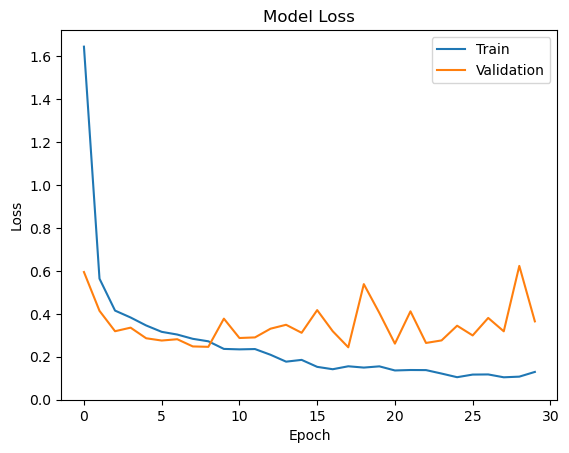

In [13]:
# Plot the training and validation loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(EPOCHS + 1, step=5))
plt.ylim(ymin=0)
plt.show()